In [1]:
!python --version

Python 3.7.12


In [ ]:
# install Tensorflow version 2.11.0 (latest)
# !pip install --upgrade -q pip
# !pip install --upgrade -q tensorflow==2.11.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
# Clone the tensorflow models repository if it doesn't already exist
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4401, done.
remote: Counting objects: 100% (4401/4401), done.
remote: Compressing objects: 100% (3215/3215), done.
remote: Total 4401 (delta 1188), reused 3100 (delta 1110), pack-reused 0 (from 0)
Receiving objects: 100% (4401/4401), 70.05 MiB | 38.92 MiB/s, done.
Resolving deltas: 100% (1188/1188), done.


In [4]:
cd /kaggle/working/

/kaggle/working


In [5]:
%%bash
cd /kaggle/working/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install -q .

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
pathos 0.3.0 requires dill>=0.3.6, but you have dill 0.3.1.1 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
multiprocess 0.70.14 requires dill>=0.3.6, but you have dill 0.3.1.1 which is incompatible.
distributed 2021.11.2 requires dask==2021.11.2, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21

In [6]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.*
# and restart or try 2 times

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboardx 2.5.1 requ

In [7]:
#run model builder test
!python /kaggle/working/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
/opt/conda/lib/python3.7/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0119 11:39:24.514139 134206531614528 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
I0119 11:39:24.811591 134206531614528 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.39s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
I0119 11:39:25.594031 134206531614528 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.78s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_

In [8]:
train_record_path = '/kaggle/input/sis-det-tfrecords/train.record'
valid_record_path = '/kaggle/input/sis-det-tfrecords/valid.record'
labelmap_path = '/kaggle/input/sis-det-tfrecords/label_map.pbtxt'

In [9]:
batch_size = 8
num_steps = 11000 # 10700 30 epochs
num_eval_steps = 104
num_classes = 6

In [10]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz
!tar -xf centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz

--2026-01-19 11:43:47--  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 192.178.210.207, 74.125.202.207, 142.250.152.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|192.178.210.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345992335 (330M) [application/x-tar]
Saving to: ‘centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz’

centernet_resnet101 100%[===================>] 329.96M   230MB/s    in 1.4s    

2026-01-19 11:43:49 (230 MB/s) - ‘centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz’ saved [345992335/345992335]



In [14]:
fine_tune_checkpoint = '/kaggle/working/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/checkpoint/ckpt-0'

In [16]:
base_config_path = '/kaggle/working/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/pipeline.config'

In [17]:
# edit configuration file
import re

with open(base_config_path) as f:
    config = f.read()

with open('centernet_resnet101.config', 'w') as f:
  
  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(valid_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(num_classes), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [18]:
%cat /kaggle/working/centernet_resnet101.config

# CenterNet meta-architecture from the "Objects as Points" [1] paper
# with the ResNet-v2-101 backbone. The ResNet backbone has a few differences
# as compared to the one mentioned in the paper, hence the performance is
# slightly worse. This config is TPU comptatible.
# [1]: https://arxiv.org/abs/1904.07850

model {
  center_net {
    num_classes: 6
    feature_extractor {
      type: "resnet_v1_101_fpn"
    }
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 512
        max_dimension: 512
        pad_to_max_dimension: true
      }
    }
    object_detection_task {
      task_loss_weight: 1.0
      offset_loss_weight: 1.0
      scale_loss_weight: 0.1
      localization_loss {
        l1_localization_loss {
        }
      }
    }
    object_center_params {
      object_center_loss_weight: 1.0
      min_box_overlap_iou: 0.7
      max_box_predictions: 100
      classification_loss {
        penalty_reduced_logistic_focal_loss {
          alpha: 2.0
          b

In [19]:
def get_pipeline_config(path):
    pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
    with tf.io.gfile.GFile(path, 'r') as f:
        text_format.Merge(f.read(), pipeline_config)

    return pipeline_config

def save_pipeline_config(pipeline_config, path):
    config_text = text_format.MessageToString(pipeline_config)
    with tf.io.gfile.GFile(path, "wb") as f:
        f.write(config_text)

In [20]:
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [21]:
pipeline_config_path = '/kaggle/working/centernet_resnet101.config'
pipeline_config = get_pipeline_config(pipeline_config_path)

In [22]:
pipeline_config.eval_config.batch_size = 1

In [26]:
# pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.total_steps = 10700
# pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.warmup_steps = 1800

In [23]:
save_pipeline_config(pipeline_config, '/kaggle/working/centernet_resnet101.config')

In [24]:
%cat /kaggle/working/centernet_resnet101.config

model {
  center_net {
    num_classes: 6
    feature_extractor {
      type: "resnet_v1_101_fpn"
    }
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 512
        max_dimension: 512
        pad_to_max_dimension: true
      }
    }
    object_detection_task {
      task_loss_weight: 1.0
      offset_loss_weight: 1.0
      scale_loss_weight: 0.1
      localization_loss {
        l1_localization_loss {
        }
      }
    }
    object_center_params {
      object_center_loss_weight: 1.0
      classification_loss {
        penalty_reduced_logistic_focal_loss {
          alpha: 2.0
          beta: 4.0
        }
      }
      min_box_overlap_iou: 0.7
      max_box_predictions: 100
    }
  }
}
train_config {
  batch_size: 8
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    random_crop_image {
      min_aspect_ratio: 0.5
      max_aspect_ratio: 1.7
      random_coef: 0.25
    }
  }
  data_augmentation_options 

In [25]:
!mkdir centernet_resnet101_training

In [30]:
model_dir = '/kaggle/working/centernet_resnet101_training/'
pipeline_config_path = '/kaggle/working/centernet_resnet101.config'

In [31]:
!python /kaggle/working/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

I0119 11:46:43.301492 139893835249472 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
I0119 11:46:43.304462 139893835249472 config_util.py:552] Maybe overwriting train_steps: 11000
I0119 11:46:43.304640 139893835249472 config_util.py:552] Maybe overwriting use_bfloat16: False
I0119 11:46:43.376246 139893835249472 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0119 11:46:43.390877 139893835249472 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0119 11:46:43.394012 139893835249472 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0119 11:46:43.395222 139893835249472 cross_device_

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir '/kaggle/working/centernet_resnet101_training/train'

In [32]:
!mkdir centernet_resnet101_inference_graph

In [33]:
output_directory = '/kaggle/working/centernet_resnet101_inference_graph'

!python /kaggle/working/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

W0119 13:25:20.417853 138130165385024 deprecation.py:356] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/autograph/pyct/static_analysis/liveness.py:83: Analyzer.lamba_check (from tensorflow.python.autograph.pyct.static_analysis.liveness) is deprecated and will be removed after 2023-09-23.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
W0119 13:25:20.493809 138130165385024 deprecation.py:628] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.

In [ ]:
# can download(f'/kaggle/working/centernet_resnet101_inference_graph/saved_model/saved_model.pb') 

In [34]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [35]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [36]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [37]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/kaggle/working/centernet_resnet101_inference_graph/saved_model')

In [38]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [40]:
# a = 0
# for image_path in glob.glob('/kaggle/input/sis-det-val/valid/*.jpg'):
#   image_np = load_image_into_numpy_array(image_path)
#   output_dict = run_inference_for_single_image(model, image_np)
#   vis_util.visualize_boxes_and_labels_on_image_array(
#       image_np,
#       output_dict['detection_boxes'],
#       output_dict['detection_classes'],
#       output_dict['detection_scores'],
#       category_index,
#       instance_masks=output_dict.get('detection_masks_reframed', None),
#       use_normalized_coordinates=True,
#       max_boxes_to_draw=20,
#       min_score_thresh=0.3,
#       line_thickness=8)
#   display(Image.fromarray(image_np))
#   a += 1
#   if a == 10:
#       break

In [ ]:
!zip -r /kaggle/working/centernet_resnet101_TFODfiles.zip /kaggle/working/

In [ ]:
!rm /kaggle/working/centernet_resnet101_TFODfiles.zip

In [41]:
# Convert to TFLite. This form of quantization is called
# post-training dynamic-range quantization in TFLite.
converter = tf.lite.TFLiteConverter.from_saved_model("/kaggle/working/centernet_resnet101_inference_graph/saved_model")

# Enable TF Select ops for unsupported operations
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS # Enable TF Select ops
]

# No optimizations
tflite_model = converter.convert()
open("SIS_TFOD_CenterNet.tflite", "wb").write(tflite_model)

176851892

TFLite outputs types and shapes:
  Output type=<class 'numpy.ndarray'>, shape=(1,)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 6)
TFLite outputs types and shapes:
  Output type=<class 'numpy.ndarray'>, shape=(1,)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 6)
TFLite outputs types and shapes:
  Output type=<class 'numpy.ndarray'>, shape=(1,)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'num

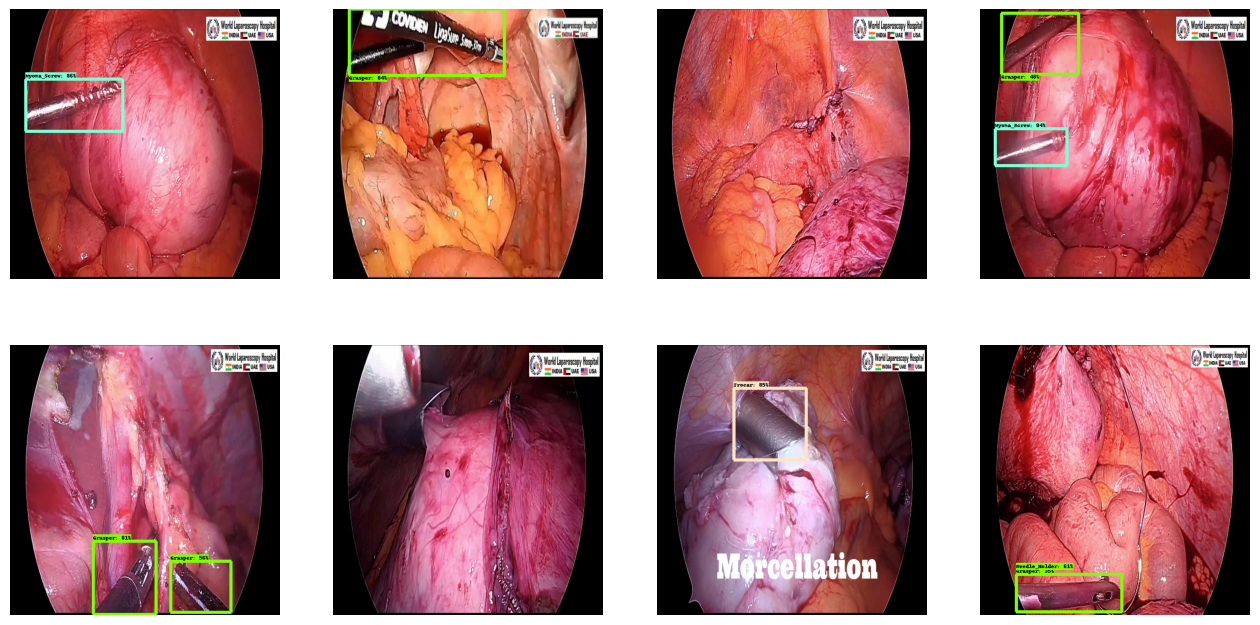

In [78]:
import os, random, cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
val_dir = "/kaggle/input/sis-det-val/valid"

min_score_thresh = 0.3
# visualization layout
N = 8
cols = 4
rows = int(np.ceil(N / cols))

# ---- MODEL DIMENSIONS FOR TFLITE INFERENCE ----
MODEL_H = 512   # TFLite model input height
MODEL_W = 512   # TFLite model input width

# ---------- LOAD TFLITE ----------
interpreter = tf.lite.Interpreter(
    model_path="/kaggle/working/SIS_TFOD_CenterNet.tflite"
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ---- FIX MODEL INPUT SHAPE (ONCE) ----
interpreter.resize_tensor_input(
    input_details[0]["index"],
    [1, MODEL_H, MODEL_W, 3],
    strict=True
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# random image selection
all_imgs = [os.path.join(val_dir, f)
            for f in os.listdir(val_dir)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))]

sample_imgs = random.sample(all_imgs, N)

# load images
raw_images = []
orig_images = []

for p in sample_imgs:
    img = cv2.imread(p)
    orig_images.append(img.copy())
    raw_images.append(np.array(img))

plt.figure(figsize=(4 * cols, 4 * rows))

for i, image in enumerate(raw_images):
    plt.subplot(2, 4, i+1)
    input_image = cv2.resize(image, (512, 512))
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    image_np = input_image.copy()
    # input_image = input_image[:,:,::-1]
    input_image = np.expand_dims(input_image, 0)

    input_data = (input_image).astype(np.uint8)
    interpreter.set_tensor(input_details[0]["index"], input_data)

    # run inference
    interpreter.invoke()

    # get outputs
    tflite_outputs = []
    print("TFLite outputs types and shapes:")
    for out_detail in output_details:
        output_tensor = interpreter.get_tensor(out_detail["index"])
        tflite_outputs.append(output_tensor)
        print(f"  Output type={type(output_tensor)}, shape={output_tensor.shape}")

    scores = tflite_outputs[4][0]  
    classes = tflite_outputs[2][0].astype(int)   
    boxes   = tflite_outputs[1][0]

    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        boxes,
        classes,
        scores,
        category_index=category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=20,
        min_score_thresh=min_score_thresh,
        agnostic_mode=False,
        instance_masks=None,
        line_thickness=6)
    plt.imshow(image_np)
    plt.axis('off')

plt.show()

In [65]:
def class_wise_nms_centernet(
    boxes,
    classes,
    scores,
    score_thresh=0.5,
    iou_thresh=0.45,
    max_detections_per_class=20
):
    final_boxes, final_classes, final_scores = [], [], []

    unique_classes = np.unique(classes)

    for cls in unique_classes:
        if cls < 0:
            continue

        cls_mask = (classes == cls) & (scores >= score_thresh)
        if not np.any(cls_mask):
            continue

        cls_boxes = boxes[cls_mask]
        cls_scores = scores[cls_mask]

        selected = tf.image.non_max_suppression(
            cls_boxes,
            cls_scores,
            max_output_size=max_detections_per_class,
            iou_threshold=iou_thresh
        ).numpy()

        final_boxes.append(cls_boxes[selected])
        final_scores.append(cls_scores[selected])
        final_classes.append(
            np.full(len(selected), cls, dtype=np.int32)
        )

    if not final_boxes:
        return (
            np.empty((0, 4)),
            np.empty((0,), dtype=np.int32),
            np.empty((0,))
        )

    return (
        np.concatenate(final_boxes),
        np.concatenate(final_classes),
        np.concatenate(final_scores)
    )

In [57]:
def global_nms(
    boxes, classes, scores,
    iou_thresh=0.5,
    max_detections=50
):
    selected = tf.image.non_max_suppression(
        boxes,
        scores,
        max_output_size=max_detections,
        iou_threshold=iou_thresh
    ).numpy()

    return (
        boxes[selected],
        classes[selected],
        scores[selected]
    )

In [60]:
def draw_labels_cv2(image, boxes, classes, scores, category_index,
                    font_scale=0.9, thickness=2):
    h, w, _ = image.shape

    for box, cls, score in zip(boxes, classes, scores):
        ymin, xmin, ymax, xmax = box
        x1, y1 = int(xmin * w), int(ymin * h)
        x2, y2 = int(xmax * w), int(ymax * h)

        if cls == 0 or cls not in category_index:
            continue

        label = f"{category_index[cls]['name']}: {score:.2f}"

        (tw, th), _ = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX,
            font_scale, thickness
        )

        cv2.rectangle(image,
                      (x1, y1 - th - 6),
                      (x1 + tw + 4, y1),
                      (0, 0, 0), -1)

        cv2.putText(
            image, label,
            (x1 + 2, y1 - 4),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            thickness,
            cv2.LINE_AA
        )

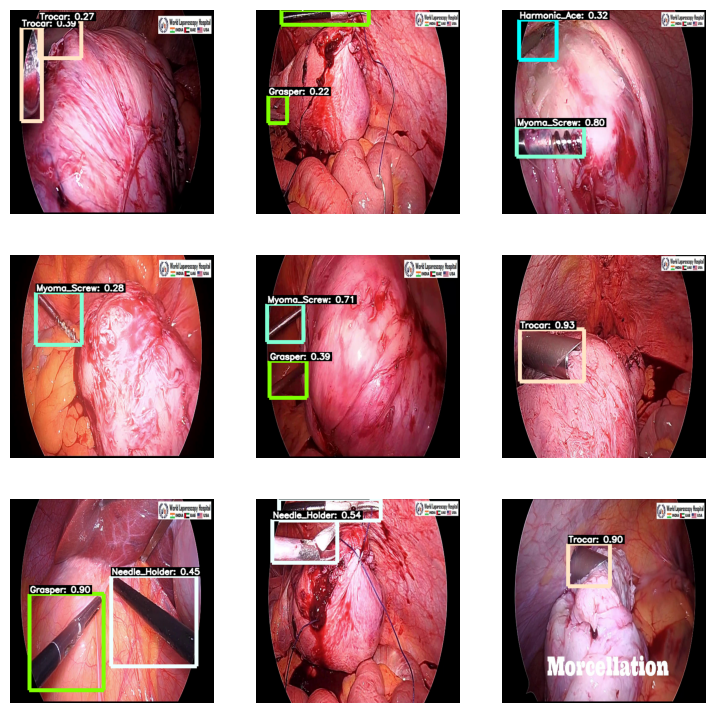

In [79]:
import os, random, cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
val_dir = "/kaggle/input/sis-det-val/valid"

min_score_thresh = 0.1
# visualization layout
N = 9
cols = 3
rows = int(np.ceil(N / cols))

# ---- MODEL DIMENSIONS FOR TFLITE INFERENCE ----
MODEL_H = 512   # TFLite model input height
MODEL_W = 512   # TFLite model input width

# ---------- LOAD TFLITE ----------
interpreter = tf.lite.Interpreter(
    model_path="/kaggle/working/SIS_TFOD_CenterNet.tflite"
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ---- FIX MODEL INPUT SHAPE (ONCE) ----
interpreter.resize_tensor_input(
    input_details[0]["index"],
    [1, MODEL_H, MODEL_W, 3],
    strict=True
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# random image selection
all_imgs = [os.path.join(val_dir, f)
            for f in os.listdir(val_dir)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))]

sample_imgs = random.sample(all_imgs, N)

# load images
raw_images = []
orig_images = []

for p in sample_imgs:
    img = cv2.imread(p)
    orig_images.append(img.copy())
    raw_images.append(np.array(img))

plt.figure(figsize=(3 * cols, 3 * rows))

for i, image in enumerate(raw_images):
    plt.subplot(3, 3, i+1)

    input_image = cv2.resize(image, (512, 512))
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    image_np = input_image.copy()

    # BGR → RGB
    # input_image = input_image[:, :, ::-1]
    input_image = np.expand_dims(input_image, 0).astype(np.uint8)

    interpreter.set_tensor(input_details[0]["index"], input_image)
    interpreter.invoke()

    # -------- get TFLite outputs --------
    tflite_outputs = [
        interpreter.get_tensor(o["index"]) for o in output_details
    ]

    # RAW outputs (before NMS)
    raw_scores = tflite_outputs[4][0]
    classes = tflite_outputs[2][0].astype(int)   
    
    raw_boxes   = tflite_outputs[1][0]

    # -------- CUSTOM NMS --------
    boxes, classes, scores = class_wise_nms_centernet(
        raw_boxes,
        classes,
        raw_scores,
        score_thresh=min_score_thresh,
        iou_thresh=0.3,
        max_detections_per_class=10
    )

    boxes, classes, scores = global_nms(
        boxes,
        classes,
        scores,
        iou_thresh=0.3,
        max_detections=10
    )
    # -------- visualize --------
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        boxes,
        classes,
        scores,
        category_index=category_index,
        use_normalized_coordinates=True,
        min_score_thresh=min_score_thresh,
        skip_labels=True,
        skip_scores=True,
        line_thickness=10
    )

    # draw big labels
    draw_labels_cv2(
        image_np,
        boxes,
        classes,
        scores,
        category_index,
        font_scale=0.7,
        thickness=2
    )

    plt.imshow(image_np)
    plt.axis("off")

plt.show()

---